In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
project = pd.read_csv(r"C:\Users\hp\Downloads\train_data (1).csv")

In [3]:
project

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0


In [4]:
project.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [5]:
project.shape

(7160, 14)

In [6]:
project.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [7]:
project['Garden'].isnull().value_counts()/len(project)*100



False    99.902235
True      0.097765
Name: Garden, dtype: float64

In [8]:
project['Building Dimension'].isnull().value_counts()/len(project)*100

False    98.519553
True      1.480447
Name: Building Dimension, dtype: float64

In [9]:
project['Date_of_Occupancy'].isnull().value_counts()/len(project)*100

False    92.905028
True      7.094972
Name: Date_of_Occupancy, dtype: float64

In [10]:
project['Geo_Code'].isnull().value_counts()/len(project)*100

False    98.575419
True      1.424581
Name: Geo_Code, dtype: float64

In [11]:
project['Garden'].fillna(project['Garden'].mode()[0], inplace=True)

In [12]:
project['Building Dimension'].fillna(project['Building Dimension'].median(), inplace=True)

In [13]:
project['Geo_Code'].fillna(project['Geo_Code'].mode()[0], inplace=True)

In [14]:
project['Date_of_Occupancy'].fillna(project['Date_of_Occupancy'].median(), inplace=True)

In [15]:
project.drop(columns = 'NumberOfWindows', inplace= True)

In [16]:
from sklearn.model_selection import train_test_split 

In [17]:
train1,test1 = train_test_split(project, test_size=0.2, random_state = 42)
train2,test2 = train_test_split(project, test_size=0.2, stratify= project.Claim, shuffle = True)


In [18]:
train1.Claim.value_counts()/len(train1)

0    0.773045
1    0.226955
Name: Claim, dtype: float64

In [19]:
train2.Claim.value_counts()/len(train2)

0    0.771823
1    0.228177
Name: Claim, dtype: float64

In [20]:
test1.Claim.value_counts()/len(test1)

0    0.76676
1    0.23324
Name: Claim, dtype: float64

In [21]:
test2.Claim.value_counts()/len(test2)

0    0.771648
1    0.228352
Name: Claim, dtype: float64

In [22]:
train_copy = train2.copy()

<AxesSubplot:xlabel='Claim', ylabel='count'>

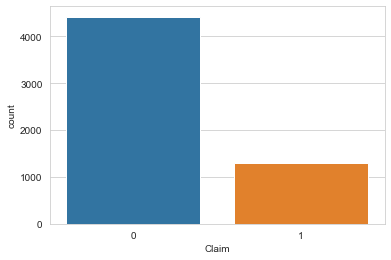

In [23]:
sns.countplot(x ='Claim', data = train_copy)

In [24]:
train_copy['Claim']

1932    0
5321    0
2064    0
2519    0
4835    0
       ..
4450    1
2428    0
3208    0
3101    1
5712    0
Name: Claim, Length: 5728, dtype: int64

In [25]:
train2

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code,Claim
1932,H6332,2015,1.000000,0,V,N,O,R,436.0,2,1900.0,26362,0
5321,H18159,2012,0.909836,1,V,N,O,R,280.0,2,1880.0,76351,0
2064,H19659,2015,0.890411,0,V,N,O,R,266.0,2,1979.0,30133,0
2519,H2253,2014,1.000000,0,V,V,V,U,2725.0,2,1980.0,34172,0
4835,H19913,2016,0.997268,0,V,N,O,R,700.0,1,2016.0,74245,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,H3029,2014,0.000000,0,V,V,V,U,550.0,2,1970.0,69069,1
2428,H13548,2014,1.000000,0,V,N,O,R,1200.0,2,1900.0,34028,0
3208,H5233,2015,1.000000,0,V,N,O,R,300.0,2,1950.0,44109,0
3101,H18769,2013,1.000000,0,V,N,O,R,5640.0,2,2012.0,42218,1


<AxesSubplot:xlabel='Garden', ylabel='count'>

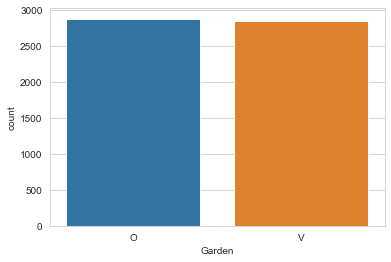

In [26]:
sns.countplot(x ='Garden', data = train_copy)

<AxesSubplot:xlabel='Settlement', ylabel='count'>

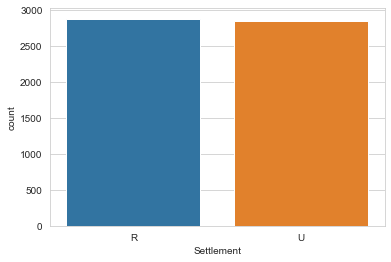

In [27]:
sns.countplot(x ='Settlement', data = train_copy)

<AxesSubplot:xlabel='Geo_Code', ylabel='count'>

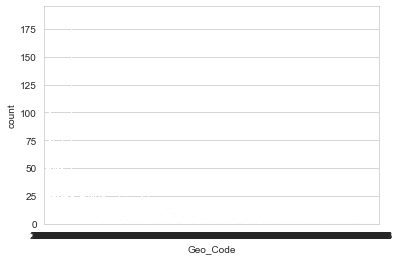

In [28]:
sns.countplot(x ='Geo_Code', data = train_copy)

<AxesSubplot:xlabel='Building Dimension', ylabel='count'>

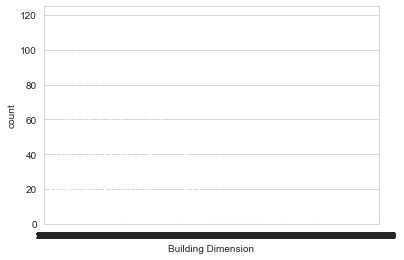

In [29]:
sns.countplot(x ='Building Dimension', data = train_copy)

<AxesSubplot:xlabel='Building_Painted', ylabel='count'>

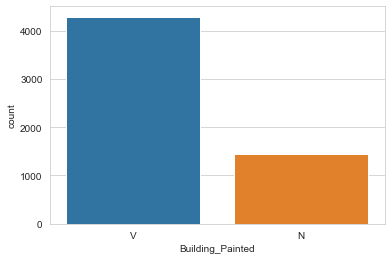

In [30]:
sns.countplot(x ='Building_Painted', data = train_copy)

<AxesSubplot:xlabel='Residential', ylabel='count'>

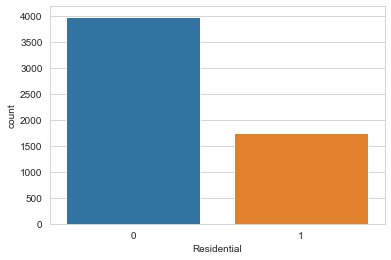

In [31]:
sns.countplot(x ='Residential', data = train_copy)

<AxesSubplot:xlabel='Building_Fenced', ylabel='count'>

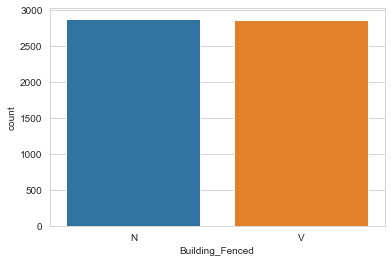

In [32]:
sns.countplot(x ='Building_Fenced', data = train_copy)

<AxesSubplot:xlabel='YearOfObservation', ylabel='count'>

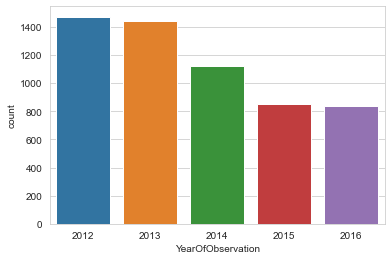

In [33]:
sns.countplot(x ='YearOfObservation', data = train_copy)

In [ ]:
sns.countplot(x ='Customer Id', data = train_copy)

<AxesSubplot:xlabel='Customer Id', ylabel='count'>

In [ ]:
sns.countplot(x ='Building_Type', data = train_copy)

In [ ]:
sns.countplot(x ='Insured_Period', data = train_copy)

In [ ]:
sns.countplot(x ='Date_of_Occupancy', data = train_copy)

In [ ]:
sns.distplot(train_copy['Geo_Code'])

In [ ]:
sns.distplot(train_copy['Building_Dimension'], bins=15)

In [ ]:
sns.distplot(train_copy['Year_Of_Observation'])

In [ ]:
sns.distplot(train_copy['Date_of_Occupancy'], bins=15)

In [ ]:
sns.distplot(train_copy['Insured_Period'], bins=15)

In [ ]:
train_copy.groupby('Residential')['Claim'].value_counts()

In [ ]:
train_copy.groupby('Building_Painted')['Claim'].value_counts()

In [ ]:
train_copy.groupby('Building_Fenced')['Claim'].value_counts()

In [ ]:
train_copy.groupby('Garden')['Claim'].value_counts()

In [ ]:
train_copy.groupby('Building_Type')['Claim'].value_counts()

In [ ]:
train_copy.groupby('Settlement')['Claim'].value_counts()

In [ ]:
sns.countplot(x='Claim', data= train_copy, hue='Building_Type')

In [ ]:
sns.countplot(x='Claim', data= train_copy, hue='Year_Of_Observation')

In [ ]:
sns.catplot(x='Claim', y= 'Insured_Period', data= train_copy)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(train_copy, x='Building_Dimension', color = 'Claim')
fig.show()

In [ ]:
fig = px.scatter(train_copy, x='Insured_Period', color = 'Claim')
fig.show()

In [ ]:
fig = px.histogram(train_copy, x='Insured_Period', color = 'Claim')
fig.show()

In [ ]:
fig = px.histogram(train_copy, x='Building_Dimension', color = 'Claim')
fig.show()

In [ ]:
fig = px.histogram(train_copy, x='Geo_Code', color = 'Claim')
fig.show()

In [ ]:
train_copy.isnull().sum()

In [ ]:
painted = pd.get_dummies(data = train_copy['Building_Painted'], prefix = 'painted')
fenced = pd.get_dummies(data = train_copy['Building_Fenced'], prefix = 'fenced')
garden = pd.get_dummies(data = train_copy['Garden'], prefix = 'Garden')
settlement = pd.get_dummies(data = train_copy['Settlement'], prefix = 'settlement')
Type = pd.get_dummies(data = train_copy['Building_Type'], prefix = 'type')

In [ ]:
train_copy = pd.concat([train_copy, painted,fenced,garden,settlement,Type], axis =1)

In [ ]:
train_copy.head(10)

In [ ]:
drop_col = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type']

In [ ]:
train_copy.drop(columns= drop_col, inplace=True)

In [ ]:
train_copy

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x = train_copy.drop(columns = 'Claim')
y = train_copy['Claim']

In [ ]:
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [ ]:
accuracy = cross_val_score(estimator=rf,X=x,y=y, cv=10, scoring='accuracy')
accuracy.mean()

In [ ]:
accuracy = cross_val_score(estimator=tree,X=x,y=y, cv=10, scoring='accuracy')
accuracy.mean()

In [ ]:
accuracy = cross_val_score(estimator=knn,X=x,y=y, cv=10, scoring='accuracy')
accuracy.mean()